In [1]:
import pickle
import numpy as np

data1 = pickle.load(open('data1.pkl', 'rb'))
data2 = pickle.load(open('data2.pkl', 'rb'))


In [2]:
X1_train = np.array(data1[0])
y1_train = np.array(data1[1])
X1_test = np.array(data1[2])
y1_test = np.array(data1[3])

X2_train = np.array(data2[0])
y2_train = np.array(data2[1])
X2_test = np.array(data2[2])
y2_test = np.array(data2[3])

In [3]:
# each column of X is a sample and last row is 1
X1_train = X1_train.T
X1_test = X1_test.T
X2_train = X2_train.T
X2_test = X2_test.T
X1_train = np.vstack((X1_train, np.ones(X1_train.shape[1])))
X1_test = np.vstack((X1_test, np.ones(X1_test.shape[1])))
X2_train = np.vstack((X2_train, np.ones(X2_train.shape[1])))
X2_test = np.vstack((X2_test, np.ones(X2_test.shape[1])))


In [4]:
def linear_regression(X, y):
    xxt = np.dot(X, X.T)
    # if inverse exists
    if np.linalg.matrix_rank(xxt) == xxt.shape[0]:
        xxt_inv = np.linalg.inv(xxt)
        print('inverse exists')
    else:
        xxt_inv = np.linalg.pinv(xxt)
        print('inverse does not exist')

    w = np.dot(xxt_inv, np.dot(X, y))
    return w


In [5]:
def ridge_regression(X, y, alpha):
    xxt = np.dot(X, X.T)
    xy = np.dot(X, y)
    I = np.eye(xxt.shape[0])
    w = np.dot(np.linalg.inv(xxt + alpha * I), xy)
    return w

### Lin reg

In [6]:
w1 = linear_regression(X1_train, y1_train)
w2 = linear_regression(X2_train, y2_train)
# calculate the mean squared error on the test set
mse1 = np.mean((np.dot(w1.T, X1_test) - y1_test) ** 2)
mse2 = np.mean((np.dot(w2.T, X2_test) - y2_test) ** 2)

print("\nOLS")
print('mse1 (D1):', mse1)
print('mse2 (D2):', mse2)

print('w1 OLS:', w1.T)
# print('w2 OLS:', w2.T)
np.savetxt("w_ols_23607.csv", w2.T, delimiter = ",")


inverse exists
inverse does not exist

OLS
mse1 (D1): 2.7685343512966045
mse2 (D2): 53.852755961317115
w1 OLS: [[0.35655766 0.32183454 0.00351676 0.8842572  0.16073379 0.07412291]]


### Ridge reg


In [14]:
alpha = 100
w1 = ridge_regression(X1_train, y1_train, alpha)
w2 = ridge_regression(X2_train, y2_train, alpha)
# calculate the mean squared error on the test set
mse1 = np.mean((np.dot(w1.T, X1_test) - y1_test) ** 2)
mse2 = np.mean((np.dot(w2.T, X2_test) - y2_test) ** 2)

print("RIDGE REGRESSION")
print('mse1 (D1):', mse1)
print('mse2 (D2):', mse2)

print('w1 Ridge:', w1.T)
# print('w2 Ridge:', w2.T)
np.savetxt("w_rr_23607.csv", w2.T, delimiter = ",")


RIDGE REGRESSION
mse1 (D1): 1.6587716233420446
mse2 (D2): 43.93170321794892
w1 Ridge: [[ 0.10344289  0.04432345 -0.02761292  0.13022108  0.0014239   0.00560629]]


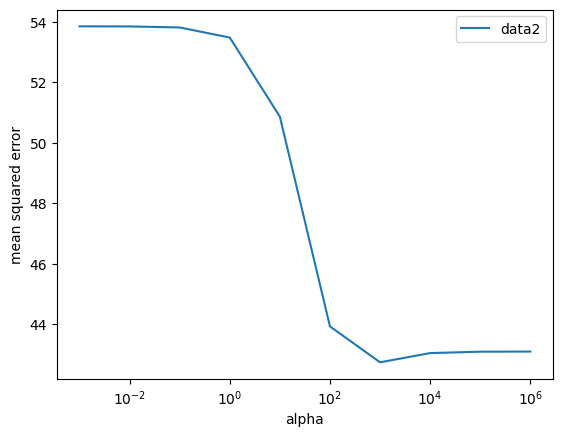

In [66]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
mse1_list = []
mse2_list = []

for alpha in alphas:
    w1 = ridge_regression(X1_train, y1_train, alpha)
    w2 = ridge_regression(X2_train, y2_train, alpha)
    # calculate the mean squared error on the test set
    mse1 = np.mean((np.dot(w1.T, X1_test) - y1_test) ** 2)
    mse2 = np.mean((np.dot(w2.T, X2_test) - y2_test) ** 2)

    # print('mse1:', mse1)
    # print('mse2:', mse2)
    mse1_list.append(mse1)
    mse2_list.append(mse2)

import matplotlib.pyplot as plt
# plt.plot(alphas, mse1_list, label='data1')
plt.plot(alphas, mse2_list, label='data2')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('mean squared error')
plt.legend()
plt.show()